<a href="https://colab.research.google.com/github/SadaouiDyhia/Principle-Component-Analysis-data-analysis/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pca

In [ ]:
import pandas as pd
from pca import pca

#le dataset choisit est celui de Longley's regression data
url = "https://vincentarelbundock.github.io/Rdatasets/csv/AER/Longley.csv"

X = pd.read_csv(url)
#X=X.rename(columns={ "Unnamed: 0" : 'Année'})
X= X.drop(columns="Unnamed: 0")
#Dimension du dataset
print(X.shape)



(16, 4)


# Présentation dataset :
Ce dataset étudie l'évolution de certains facteurs microeconomiques selon les années: 
(individus: Années, variables : facteurs économiques ) 

* le nombre de personnes employés 'employment'
*  déflateur du produit national brut 'price'  ( suit l'evolution des prix des biens et des services dans tous les domaines economiques nationals, plus il augmente, plus le prix augmente ) 

* produit national brut 'GNP' 
* nombres de personnes dans les forces armées 'armedforces'

In [ ]:
#affichage des données
print(X)



    employment  price     gnp  armedforces
0        60323   83.0  234289         1590
1        61122   88.5  259426         1456
2        60171   88.2  258054         1616
3        61187   89.5  284599         1650
4        63221   96.2  328975         3099
5        63639   98.1  346999         3594
6        64989   99.0  365385         3547
7        63761  100.0  363112         3350
8        66019  101.2  397469         3048
9        67857  104.6  419180         2857
10       68169  108.4  442769         2798
11       66513  110.8  444546         2637
12       68655  112.6  482704         2552
13       69564  114.2  502601         2514
14       69331  115.7  518173         2572
15       70551  116.9  554894         2827


# ACP normée

On utilise une ACP normée a cause de la différence de grandeur entre les différents facteurs

Construction de la matrice centrée réduite

In [ ]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)


[[-1.4686297  -1.78787162 -1.59405086 -1.50883856]
 [-1.23366071 -1.26149924 -1.33285665 -1.70770436]
 [-1.51332968 -1.29021046 -1.34711286 -1.47025266]
 [-1.21454558 -1.16579518 -1.07128837 -1.41979418]
 [-0.61638924 -0.52457792 -0.61018505  0.73062773]
 [-0.49346428 -0.34274019 -0.4229008   1.46524391]
 [-0.09645786 -0.25660653 -0.23185506  1.39549248]
 [-0.45758667 -0.16090246 -0.25547341  1.10313008]
 [ 0.20644334 -0.04605758  0.10152422  0.65494001]
 [ 0.74696024  0.27933625  0.32711946  0.37148205]
 [ 0.83871283  0.64301171  0.57222866  0.28392173]
 [ 0.35171829  0.87270147  0.59069316  0.04498597]
 [ 0.98163515  1.04496879  0.98718632 -0.08116025]
 [ 1.24895281  1.1980953   1.1939326  -0.13755502]
 [ 1.18043244  1.3416514   1.35573855 -0.05147879]
 [ 1.53920862  1.45649628  1.73730009  0.32695985]]


In [ ]:
#vérification - librairie numpy
import numpy
#moyenne
print(numpy.mean(Z,axis=0))


[ 0.00000000e+00 -4.99600361e-16  2.77555756e-17  0.00000000e+00]


In [ ]:
#écart-type
print(numpy.std(Z,axis=0,ddof=0))

[1. 1. 1. 1.]


In [ ]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


#Les coordonnées factorielles Fik

In [ ]:
#les coordonnées factorielles Fik sont collectées dans la variable coord
coord = acp.fit_transform(Z)
#vérification nombre de composantes calculées
print(acp.n_components_)

4


In [ ]:
#Apres recherches: apparemment python des valeurs pas exactes des variances avec la premiere fct, du coup il faut appliquer une correction
#variance expliquée
print(acp.explained_variance_)
#valeur corrigée
n=16
eigval = (n-1)/n*acp.explained_variance_
print(eigval)
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)



[3.45858362 0.77003075 0.03202186 0.00603044]
[3.24242214 0.72190382 0.0300205  0.00565354]
[3.24242214 0.72190382 0.0300205  0.00565354]


In [ ]:
#####proportion de variance expliquée
print(acp.explained_variance_ratio_)


[0.81060554 0.18047596 0.00750512 0.00141338]


**Proportions de variance par rapport a chaque variable:** 

*  employment:81% 
* price:18%   
* gnp:0.75% 
* armedforces:0.14%


##Screen plot 

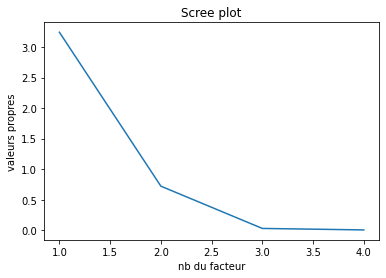

In [ ]:
#scree plot

#acp.explained_variance_ratio_.plot();

import matplotlib.pyplot as plt
p=4
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("valeurs propres")
plt.xlabel("num du facteur")
plt.show()

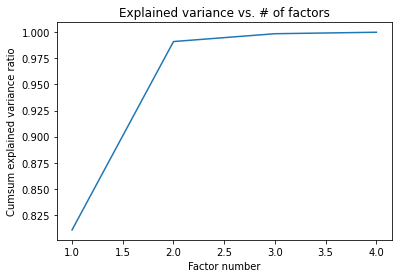

In [ ]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [ ]:
#Les variables a retenir

#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))



   Val.Propre    Seuils
0    3.242422  2.083333
1    0.721904  1.083333
2    0.030020  0.583333
3    0.005654  0.250000


j'ai essayer d'utiliser plusieurs méthodes pour détérminer quelles variables retenirs, les 3 méthodes nous donnent presque le meme résultat. On peut remarquer d'apres les resultats au dessus qu'on peut prendre les 2 premieres variables: L'évolution dans le temps(année) et emploiment (employment)

# Nuage des individus :

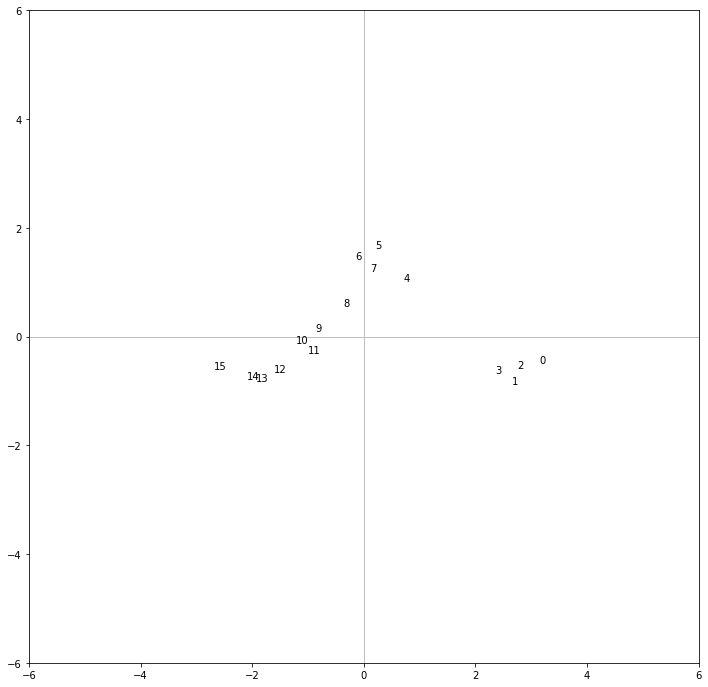

In [ ]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(16):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [ ]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))


    ID        d_i
0    0  10.170950
1    1   7.806060
2    2   7.931166
3    3   5.997674
4    4   1.561260
5    5   2.686763
6    6   2.076307
7    7   1.517438
8    8   0.483994
9    9   0.880984
10  10   1.524960
11  11   1.236256
12  12   3.036691
13  13   4.439712
14  14   5.034126
15  15   7.615659


On remarque que la premiere année (0) et la derniere année (15) se démarques des autres, on les trouves a 2 extrémités, ce qui est logique puisqu'elle sont représentées par des nombres croissants  

In [ ]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

    id    COS2_1    COS2_2
0    0  0.971259  0.024009
1    1  0.901046  0.098041
2    2  0.952468  0.043929
3    3  0.921717  0.076745
4    4  0.323524  0.674050
5    5  0.014673  0.981466
6    6  0.010128  0.982640
7    7  0.007823  0.961932
8    8  0.267794  0.662013
9    9  0.839073  0.009571
10  10  0.963983  0.010139
11  11  0.815189  0.074459
12  12  0.858049  0.140837
13  13  0.844970  0.154362
14  14  0.871661  0.124995
15  15  0.947389  0.047848


In [ ]:
#contributions des individus aux axes
#Elles permettent de déterminer les individus qui pèsent le plus dans la définition de chaque facteur
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))


    id     CTR_1     CTR_2
0    0  0.190417  0.021142
1    1  0.135578  0.066258
2    2  0.145612  0.030164
3    3  0.106559  0.039851
4    4  0.009736  0.091110
5    5  0.000760  0.228300
6    6  0.000405  0.176639
7    7  0.000229  0.126373
8    8  0.002498  0.027740
9    9  0.014249  0.000730
10  10  0.028336  0.001339
11  11  0.019426  0.007969
12  12  0.050225  0.037027
13  13  0.072311  0.059333
14  14  0.084583  0.054477
15  15  0.139074  0.031548


# Nuage des variables:

In [ ]:
#le champ components_ de l'objet ACP
print(acp.components_)

#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)

#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)


[[-0.54303431 -0.54516766 -0.54541108 -0.33231418]
 [-0.18778381 -0.18006993 -0.20759591  0.9429825 ]
 [-0.77435127  0.6120883   0.16038695 -0.00201092]
 [-0.26501149 -0.5437968   0.79605698  0.01863434]]
[[-9.77827050e-01 -1.59550367e-01 -1.34167381e-01 -1.99262144e-02]
 [-9.81668510e-01 -1.52996275e-01  1.06053012e-01 -4.08880825e-02]
 [-9.82106846e-01 -1.76383708e-01  2.77893218e-02  5.98555259e-02]
 [-5.98389074e-01  8.01204363e-01 -3.48419992e-04  1.40111627e-03]]


In [ ]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))


            id     COR_1     COR_2
0   employment -0.977827 -0.159550
1        price -0.981669 -0.152996
2          gnp -0.982107 -0.176384
3  armedforces -0.598389  0.801204


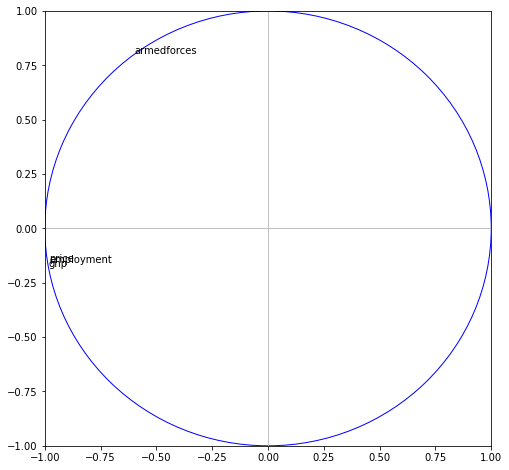

In [ ]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


Axe des X : 1ere PC : emploiment 


Axe des Y: 2eme PC : deflateur de produit brut 


Le cercle des corrélations, variables-facteurs, montre que les variables d’origine sont très bien expliquées par les deux premières CP car tous les points se trouvent très près du cercle unité.

In [ ]:
#Qualité de présentation des variables: cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

            id    COS2_1    COS2_2
0   employment  0.956146  0.025456
1        price  0.963673  0.023408
2          gnp  0.964534  0.031111
3  armedforces  0.358069  0.641928


In [ ]:
#contributions des variables aux axes
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

            id     CTR_1     CTR_2
0   employment  0.294886  0.035263
1        price  0.297208  0.032425
2          gnp  0.297473  0.043096
3  armedforces  0.110433  0.889216


In [ ]:
#X.plot()

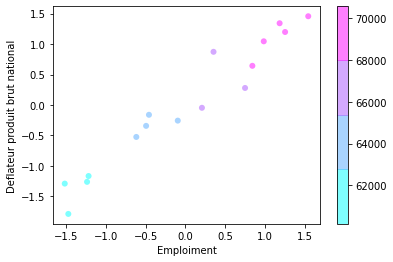

In [ ]:
plt.scatter(Z[:, 0], Z[:, 1],
            c=X.employment, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('cool', 4))
plt.xlabel('Emploiment')
plt.ylabel('Deflateur produit brut national')
plt.colorbar();

le deflateur de produit national brut montre la valeur ajoutée par les employés - la valeur des ressources nécessaires, on voit clairement a travers le graphe que plus on emploie de personne plus on a plus de valeur brut nationale ajoutée